In [23]:
# 6/21 update from v1: Trying out Pycaret with normalize=True in setup() function.

In [1]:
import pycaret
import pandas as pd
import numpy as np
from pycaret.classification import *

In [2]:
def pycaret_setup_and_model_table(df, target_var):
    s = setup(df, target = TARGET_VAR, session_id = 1, normalize=True)
    best = compare_models()
    return best

In [3]:
def add_columns(df, cols_to_add, df_s2d):
    df = df.copy()
    for i in range(len(cols_to_add)):
        df[cols_to_add[i]] = df_s2d[cols_to_add[i]]

    df.insert(len(df.columns) - 1, 'FTR', df.pop('FTR'))
    return df

In [4]:
TARGET_VAR = 'FTR'

In [5]:
base_df = pd.read_csv('INPUTS/sl_base_dataset_20230621.csv')
print(base_df.shape)
base_df.head(2)

(8020, 22)


,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,13,12,6,6,1,2,0,0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,19,14,7,7,1,2,0,0


# 1. Testing the models with the base dataset (all 22 seasons.  2000-2022)
### excluded: full match score, winner, halftime results

In [6]:
for i in range(len(base_df.columns)):
    print(i, base_df.columns[i])

0 season
1 Date
2 HomeTeam
3 AwayTeam
4 FTHG
5 FTAG
6 FTR
7 HTHG
8 HTAG
9 HTR
10 HS
11 AS
12 HST
13 AST
14 HF
15 AF
16 HC
17 AC
18 HY
19 AY
20 HR
21 AR


In [7]:
working_df = base_df.copy()

# TRIM base_df
# pop the column you want to move and insert in specified index.
# keep target column
working_df.insert(len(working_df.columns) - 1, 'FTR', working_df.pop('FTR'))

working_df = working_df.iloc[:, 9:] # (all rows, column 9 onwards)
print(working_df.shape)
working_df.head(2)

(8020, 13)


,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,17,8,14,4,13,12,6,6,1,2,0,0,H
1,17,12,10,5,19,14,7,7,1,2,0,0,H


In [8]:
best = pycaret_setup_and_model_table(working_df, TARGET_VAR)

,Description,Value
0,Session id,1
1,Target,FTR
2,Target type,Multiclass
3,Target mapping,"A: 0, D: 1, H: 2"
4,Original data shape,"(8020, 13)"
5,Transformed data shape,"(8020, 13)"
6,Transformed train set shape,"(5614, 13)"
7,Transformed test set shape,"(2406, 13)"
8,Numeric features,12
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5661,0.7204,0.5661,0.5144,0.4995,0.2800,0.3052,0.9690
lda,Linear Discriminant Analysis,0.5650,0.7197,0.5650,0.5173,0.5085,0.2808,0.3019,0.6660
ridge,Ridge Classifier,0.5631,0.0000,0.5631,0.5008,0.4836,0.2695,0.3005,0.6380
gbc,Gradient Boosting Classifier,0.5623,0.7208,0.5623,0.5187,0.5162,0.2818,0.2977,0.9960
ada,Ada Boost Classifier,0.5574,0.7018,0.5574,0.5194,0.5078,0.2724,0.2899,0.6620
svm,SVM - Linear Kernel,0.5517,0.0000,0.5517,0.5079,0.4900,0.2564,0.2792,0.6250
et,Extra Trees Classifier,0.5515,0.6969,0.5515,0.5135,0.5134,0.2666,0.2788,0.8960
rf,Random Forest Classifier,0.5511,0.6964,0.5511,0.5150,0.5158,0.2680,0.2790,0.8690
qda,Quadratic Discriminant Analysis,0.5497,0.6934,0.5497,0.4899,0.4863,0.2491,0.2727,0.6510
lightgbm,Light Gradient Boosting Machine,0.5417,0.7007,0.5417,0.5074,0.5128,0.2576,0.2652,0.7030


# ============================================================

# ============================================================

# 2.  ADDING SEASON-TO-DATE (S2D) metrics to the dataset and models
### acc increases to .58

In [13]:
# df_s2d = pd.read_excel('INPUTS/derived_dataset_SL_TEST_v1.xlsx')
df_s2d = pd.read_csv('INPUTS/sl_derived_dataset_20230621.csv')
print(df_s2d.shape)
df_s2d.head(2)

# Note: it is normal to see NaN values at the start of each season

(8020, 101)


,date,season,home_team,away_team,FTR,H_home_goals_s2d,H_away_goals_s2d,H_total_goals_s2d,H_avg_home_goals_s2d,H_avg_away_goals_s2d,...,A_total_corners_s2d,A_avg_home_corners_s2d,A_avg_away_corners_s2d,A_avg_corners_s2d,A_home_corners_against_s2d,A_away_corners_against_s2d,A_total_corners_against_s2d,A_avg_home_corners_against_s2d,A_avg_away_corners_against_s2d,A_avg_corners_against_s2d
0,2000-08-19,1,Charlton,Man City,H,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-08-19,1,Chelsea,West Ham,H,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# These are the columns we want to copy from S2D dataframe to the working dataframe.
# Reasoning: avg s2d values seem to improve the model

cols_to_add =   [
 'H_avg_home_goals_s2d', 'H_avg_away_goals_s2d', 'H_avg_goals_s2d',
 'A_avg_home_goals_s2d', 'A_avg_away_goals_s2d', 'A_avg_goals_s2d', 
 
 'H_avg_home_goals_against_s2d', 'H_avg_away_goals_against_s2d', 'H_avg_goals_against_s2d', 
 'A_avg_home_goals_against_s2d', 'A_avg_away_goals_against_s2d', 'A_avg_goals_against_s2d',
 
 'H_avg_home_shots_on_target_s2d', 'H_avg_away_shots_on_target_s2d', 'H_avg_shots_on_target_s2d',
  'A_avg_home_shots_on_target_s2d', 'A_avg_away_shots_on_target_s2d', 'A_avg_shots_on_target_s2d',

 'H_avg_home_shots_on_target_against_s2d', 'H_avg_away_shots_on_target_against_s2d', 'H_avg_shots_on_target_against_s2d',
 'A_avg_home_shots_on_target_against_s2d', 'A_avg_away_shots_on_target_against_s2d', 'A_avg_shots_on_target_against_s2d',

     'H_avg_home_corners_s2d','H_avg_away_corners_s2d', 'H_avg_corners_s2d',
     'A_avg_home_corners_s2d', 'A_avg_away_corners_s2d', 'A_avg_corners_s2d',

    'H_avg_home_corners_against_s2d', 'H_avg_away_corners_against_s2d', 'H_avg_corners_against_s2d',
     'A_avg_home_corners_against_s2d', 'A_avg_away_corners_against_s2d', 'A_avg_corners_against_s2d'
]

In [15]:
working_df = add_columns(working_df, cols_to_add, df_s2d)
working_df

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,A_avg_home_corners_s2d,A_avg_away_corners_s2d,A_avg_corners_s2d,H_avg_home_corners_against_s2d,H_avg_away_corners_against_s2d,H_avg_corners_against_s2d,A_avg_home_corners_against_s2d,A_avg_away_corners_against_s2d,A_avg_corners_against_s2d,FTR
0,17,8,14,4,13,12,6,6,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
1,17,12,10,5,19,14,7,7,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
2,6,16,3,9,15,21,8,4,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,6,13,4,6,11,13,5,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
4,17,12,8,6,21,20,6,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015,6,10,3,4,12,22,3,6,2,4,...,5.000000,5.444444,5.216216,4.277778,5.315789,4.810811,5.157895,6.000000,5.567568,H
8016,12,7,6,2,10,5,3,3,0,1,...,6.052632,6.444444,6.243243,5.500000,6.210526,5.864865,5.157895,5.333333,5.243243,H
8017,29,7,8,5,6,3,5,3,1,0,...,4.631579,4.277778,4.459459,3.166667,3.000000,3.081081,5.263158,5.500000,5.378378,H
8018,24,4,5,2,5,11,13,1,0,1,...,4.736842,5.833333,5.270270,2.166667,3.578947,2.891892,5.578947,5.722222,5.648649,H


In [16]:
#run pycaret model table
best = pycaret_setup_and_model_table(working_df, TARGET_VAR)

,Description,Value
0,Session id,1
1,Target,FTR
2,Target type,Multiclass
3,Target mapping,"A: 0, D: 1, H: 2"
4,Original data shape,"(8020, 49)"
5,Transformed data shape,"(8020, 49)"
6,Transformed train set shape,"(5614, 49)"
7,Transformed test set shape,"(2406, 49)"
8,Numeric features,48
9,Rows with missing values,11.3%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5803,0.7422,0.5803,0.5385,0.5335,0.3131,0.3302,0.6990
ridge,Ridge Classifier,0.5800,0.0000,0.5800,0.5248,0.5120,0.3049,0.3314,0.6670
gbc,Gradient Boosting Classifier,0.5784,0.7428,0.5784,0.5396,0.5374,0.3104,0.3255,0.7240
lda,Linear Discriminant Analysis,0.5759,0.7421,0.5759,0.5360,0.5360,0.3080,0.3217,0.7110
ada,Ada Boost Classifier,0.5682,0.7113,0.5682,0.5264,0.5235,0.2950,0.3099,0.6920
lightgbm,Light Gradient Boosting Machine,0.5664,0.7298,0.5664,0.5298,0.5365,0.2992,0.3076,0.7140
et,Extra Trees Classifier,0.5574,0.7041,0.5574,0.5013,0.5007,0.2653,0.2866,0.7660
rf,Random Forest Classifier,0.5531,0.7057,0.5531,0.5076,0.5059,0.2634,0.2798,0.7020
svm,SVM - Linear Kernel,0.5509,0.0000,0.5509,0.5123,0.5116,0.2747,0.2864,0.6650
nb,Naive Bayes,0.5175,0.6860,0.5175,0.5061,0.5095,0.2454,0.2467,0.6690


In [13]:
# plot_model(best, plot = 'confusion_matrix')

In [17]:
# plot_model(best, plot = 'auc')

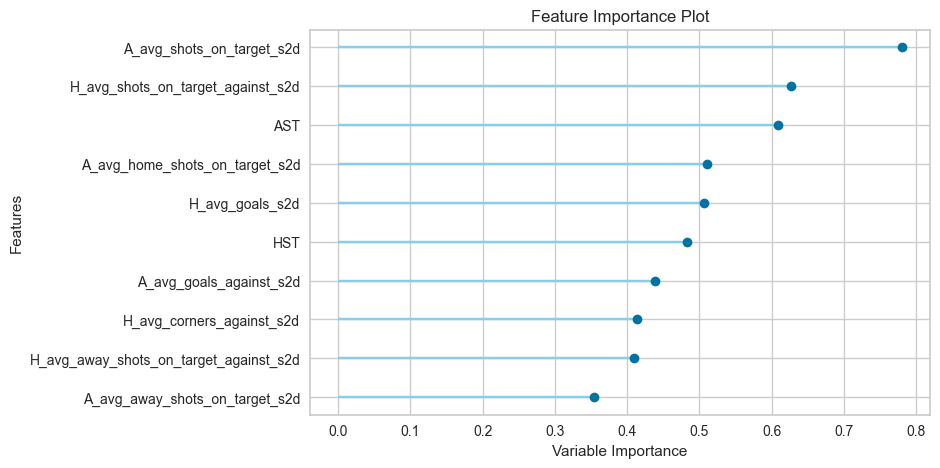

In [18]:
plot_model(best, plot = 'feature')

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# TEST NUMBER 2: INCLUDE S2D Metrics and HALFTIME RESULT

### Result: acc increases to ~.65

In [19]:
working_df2 = base_df.copy()
working_df2.insert(len(working_df2.columns) - 1, 'HTHG', working_df2.pop('HTHG'))
working_df2.insert(len(working_df2.columns) - 1, 'HTAG', working_df2.pop('HTAG'))
working_df2.insert(len(working_df2.columns) - 1, 'FTR', working_df2.pop('FTR'))
working_df2

,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTR,HS,AS,HST,...,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,FTR
0,1,2000-08-19,Charlton,Man City,4,0,H,17,8,14,...,12,6,6,1,2,0,0,2,0,H
1,1,2000-08-19,Chelsea,West Ham,4,2,H,17,12,10,...,14,7,7,1,2,0,0,1,0,H
2,1,2000-08-19,Coventry,Middlesbrough,1,3,D,6,16,3,...,21,8,4,5,3,1,0,1,1,A
3,1,2000-08-19,Derby,Southampton,2,2,A,6,13,4,...,13,5,8,1,1,0,0,1,2,D
4,1,2000-08-19,Leeds,Everton,2,0,H,17,12,8,...,20,6,4,1,3,0,0,2,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015,22,2022-05-22,Crystal Palace,Man United,1,0,H,6,10,3,...,22,3,6,2,4,0,0,1,0,H
8016,22,2022-05-22,Leicester,Southampton,4,1,D,12,7,6,...,5,3,3,0,1,0,0,0,0,H
8017,22,2022-05-22,Liverpool,Wolves,3,1,D,29,7,8,...,3,5,3,1,0,0,0,1,1,H
8018,22,2022-05-22,Man City,Aston Villa,3,2,A,24,4,5,...,11,13,1,0,1,0,0,0,1,H


In [20]:
working_df2 = working_df2.iloc[:, 7:]
print(working_df2.shape)
working_df2.head(2)

(8020, 15)


,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,FTR
0,17,8,14,4,13,12,6,6,1,2,0,0,2,0,H
1,17,12,10,5,19,14,7,7,1,2,0,0,1,0,H


#### Add avg columns from S2D df

In [21]:
working_df2 = add_columns(working_df2, cols_to_add, df_s2d)
working_df2

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,...,A_avg_home_corners_s2d,A_avg_away_corners_s2d,A_avg_corners_s2d,H_avg_home_corners_against_s2d,H_avg_away_corners_against_s2d,H_avg_corners_against_s2d,A_avg_home_corners_against_s2d,A_avg_away_corners_against_s2d,A_avg_corners_against_s2d,FTR
0,17,8,14,4,13,12,6,6,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
1,17,12,10,5,19,14,7,7,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
2,6,16,3,9,15,21,8,4,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,6,13,4,6,11,13,5,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
4,17,12,8,6,21,20,6,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015,6,10,3,4,12,22,3,6,2,4,...,5.000000,5.444444,5.216216,4.277778,5.315789,4.810811,5.157895,6.000000,5.567568,H
8016,12,7,6,2,10,5,3,3,0,1,...,6.052632,6.444444,6.243243,5.500000,6.210526,5.864865,5.157895,5.333333,5.243243,H
8017,29,7,8,5,6,3,5,3,1,0,...,4.631579,4.277778,4.459459,3.166667,3.000000,3.081081,5.263158,5.500000,5.378378,H
8018,24,4,5,2,5,11,13,1,0,1,...,4.736842,5.833333,5.270270,2.166667,3.578947,2.891892,5.578947,5.722222,5.648649,H


In [22]:
#run pycaret model table
best = pycaret_setup_and_model_table(working_df2, TARGET_VAR)

,Description,Value
0,Session id,1
1,Target,FTR
2,Target type,Multiclass
3,Target mapping,"A: 0, D: 1, H: 2"
4,Original data shape,"(8020, 51)"
5,Transformed data shape,"(8020, 51)"
6,Transformed train set shape,"(5614, 51)"
7,Transformed test set shape,"(2406, 51)"
8,Numeric features,50
9,Rows with missing values,11.3%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6525,0.8286,0.6525,0.6257,0.6304,0.4447,0.4516,0.7540
ridge,Ridge Classifier,0.6507,0.0000,0.6507,0.6124,0.5999,0.4301,0.4525,0.7120
lda,Linear Discriminant Analysis,0.6507,0.8251,0.6507,0.6373,0.6416,0.4481,0.4502,0.7070
gbc,Gradient Boosting Classifier,0.6464,0.8265,0.6464,0.6211,0.6258,0.4355,0.4419,4.4480
ada,Ada Boost Classifier,0.6446,0.7867,0.6446,0.6179,0.6224,0.4322,0.4392,0.8980
lightgbm,Light Gradient Boosting Machine,0.6388,0.8195,0.6388,0.6170,0.6235,0.4267,0.4304,1.0390
et,Extra Trees Classifier,0.6341,0.8055,0.6341,0.5951,0.5972,0.4063,0.4205,1.0070
rf,Random Forest Classifier,0.6325,0.8001,0.6325,0.6001,0.6001,0.4063,0.4185,1.5330
svm,SVM - Linear Kernel,0.6240,0.0000,0.6240,0.5929,0.5890,0.3961,0.4088,0.8120
qda,Quadratic Discriminant Analysis,0.5850,0.7539,0.5850,0.5650,0.5656,0.3324,0.3396,0.7380


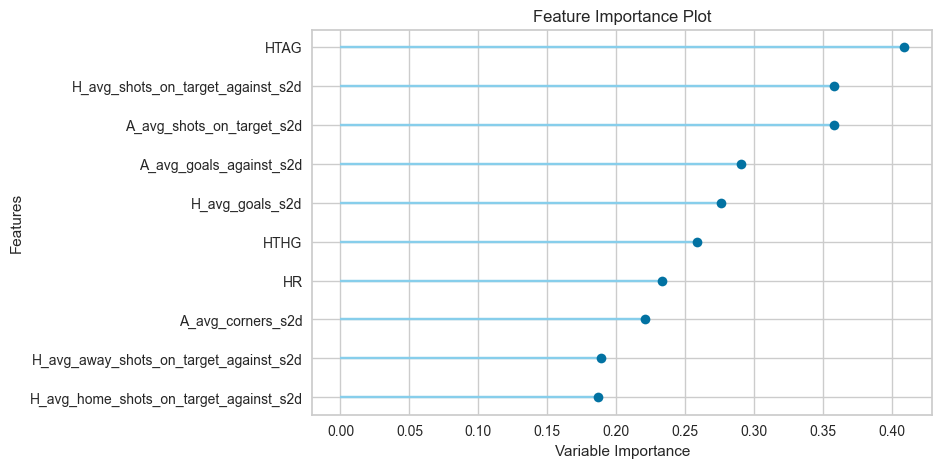

In [20]:
plot_model(best, plot = 'feature')